<a href="https://colab.research.google.com/github/RajiRai/FastAI/blob/master/Covid19_prediction_using_X_ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
path = Path ('/content/gdrive/My Drive/Covid19images')

In [ ]:
path.ls()

(#3) [Path('/content/gdrive/My Drive/Covid19images/test'),Path('/content/gdrive/My Drive/Covid19images/train'),Path('/content/gdrive/My Drive/Covid19images/validation')]

(362, 445)


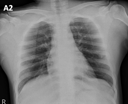

In [ ]:
from PIL import Image
img = Image.open(path/'train/train/covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png') 
print(img.shape)
img.to_thumb(128,128)

In [ ]:
traincovid=Path('/content/gdrive/My Drive/Covid19images/train/train/covid')

In [ ]:
validate=get_image_files(traincovid)
vali=verify_images(validate)
vali


In [ ]:
tfms = aug_transforms(do_flip = True, flip_vert = False, mult=2.0)


In [ ]:
data=ImageDataLoaders.from_folder(path, train = "train",valid="validation", item_tfms=Resize(128), batch_tfms=tfms, bs = 30, num_workers = 4) 

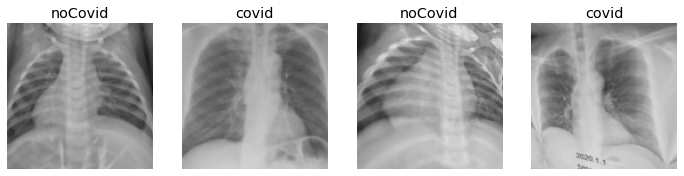

In [ ]:
data.train.show_batch(max_n=4, nrows=1)

In [ ]:
learn = cnn_learner(data, resnet34, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.907117,0.258476,0.150000,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.745225,0.171091,0.062500,00:08
1,0.632701,0.135354,0.062500,00:08
2,0.568878,0.158571,0.062500,00:08
3,0.565530,0.162595,0.062500,00:08


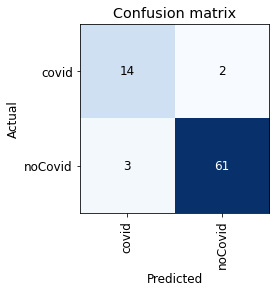

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.most_confused(min_val=2)

[('noCovid', 'covid', 4)]

In [ ]:
data.c, len(data.train_ds), len(data.valid_ds)

(2, 154, 80)

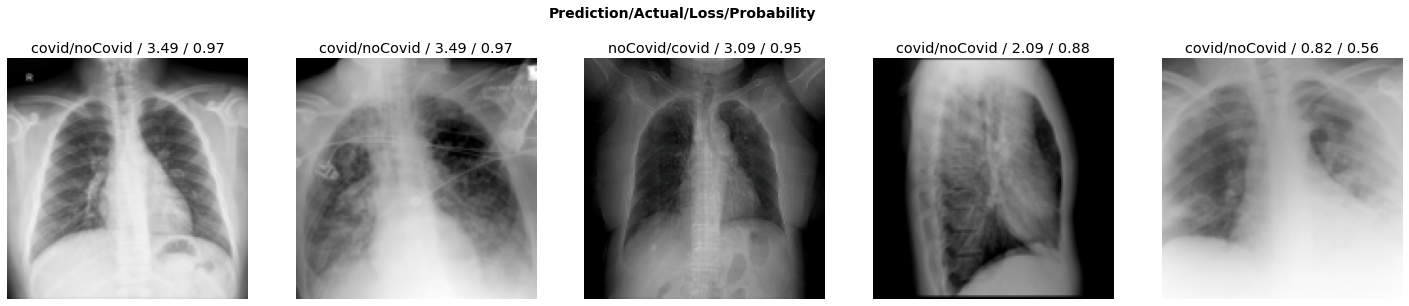

In [ ]:
interp.plot_top_losses(5, nrows=1, figsize = (25,5))

In [ ]:
learn.export()

In [ ]:
path.ls(file_exts='.pkl')

(#1) [Path('/content/gdrive/My Drive/Covid19images/export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('/content/gdrive/My Drive/Covid19images/test/test/noCovid/NORMAL2-IM-1041-0001.jpeg')

('noCovid', tensor(1), tensor([5.4443e-05, 9.9995e-01]))

In [ ]:
learn_inf.dls.vocab

(#2) ['covid','noCovid']

In [119]:
btn_run = widgets.Button(description='Classify')

In [121]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [122]:
btn_upload = widgets.FileUpload()

In [123]:
out_pl = widgets.Output()

In [124]:
lbl_pred = widgets.Label()

In [126]:
VBox([widgets.Label('Select a X-ray'),btn_upload, btn_run, out_pl, lbl_pred])